In [2]:
import scipy as sp
from scipy import linalg as la
from scipy.sparse import spdiags
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
import numpy as np
import matplotlib.pyplot as plt

# Problem 1

Use the finite element method to solve
 
εy" − y' = −1,

y(0) = α, y(1) = β,


where α = 2, β = 4, and ε = 0.02. Use N = 100 finite elements (101 grid points). Compare
your solution with the analytic solution

y(x) = α + x + (β − α − 1)* (e^(x/ε) − 1)/(e^(1/ε) − 1) by graphing.


In [12]:
def solve_finite(N, alpha, beta, eps, X):
    h = lambda i: X[i] - X[i-1]
    def a(i, j):
        if j == i+1:
            return eps / h(i+1) + 1/2
        elif j == i:
            return -eps / h(i) - eps / h(i+1)
        elif j == i-1:
            return eps / h(i) - 1/2
        else:
            return 0

    # Create big A matrix
    diag1 = np.array([a(i,i+1) if i != N-1 else 0 for i in range(N)])
    diag2 = np.array([a(i,i) if i != 0 and i!= N else 1 for i in range(N+1)])
    diag3 = np.array([a(i+1,i) if i != 0 else 0 for i in range(N)])

    AB = np.zeros((3,N+1))
    AB[0][1:] = diag3
    AB[1] = diag2
    AB[2][:-1] = diag1

    # Create right hand side of equation
    l = lambda j: -1./2 * (h(j) + h(j+1))
    cap_phi = np.arange(1, N)
    cap_phi = l(cap_phi)
    cap_phi = np.insert(cap_phi, 0, alpha, axis=0)
    cap_phi = np.append(cap_phi, beta)

    return la.solve_banded((1, 1), AB, cap_phi)

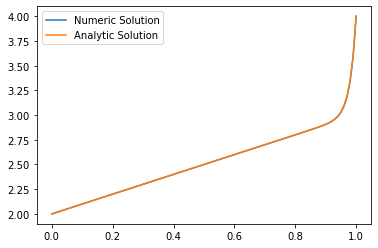

In [13]:
N = 100
alpha = 2
beta = 4
eps = .02
X = np.linspace(0, 1, N+1)

x = solve_finite(N, alpha, beta, eps, X)
plt.plot(X, x, label = 'Numeric Solution')

y = lambda x: alpha + x + (beta - alpha - 1) * (np.exp(x/eps) - 1) / (np.exp(1/eps) - 1)
plt.plot(X, y(X), label = 'Analytic Solution')

plt.legend()
plt.show()

# Problem 2

Compare the numerical solution when the grid points are unevenly spaced versus when the grid points
are clustered in the area of greatest change by plotting.

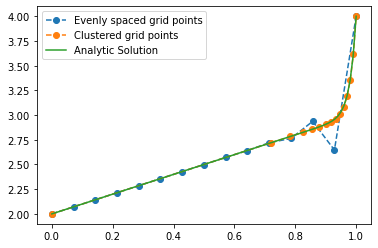

In [21]:
N = 14
alpha = 2
beta = 4
eps = .02

# Evenly spaced
even_grid = np.linspace(0,1,15)
x = solve_finite(N, alpha, beta, eps, even_grid)
plt.plot(even_grid, x, 'o--', label = 'Evenly spaced grid points')

# Clustered
clustered_grid = np.linspace(0,1,15)**(1./8)
x = solve_finite(N, alpha, beta, eps, clustered_grid)
plt.plot(clustered_grid, x, 'o--', label = 'Clustered grid points')

# True solution
y = lambda x: alpha + x + (beta - alpha - 1) * (np.exp(x/eps) - 1) / (np.exp(1/eps) - 1)
plt.plot(X, y(X), label = 'Analytic Solution')

plt.legend()
plt.show()

# Problem 3

Solve (11.5) with the finite element method using N = 2^i finite elements, i = 4, 5, . . . , 21.

Use a log-log plot to graph the error.

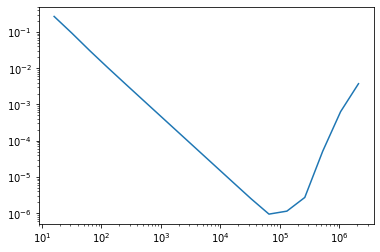

In [23]:
N = [2**i for i in np.arange(4, 22)]

alpha = 2
beta = 4
eps = .02

y = lambda x: alpha + x + (beta - alpha - 1) * (np.exp(x/eps) - 1) / (np.exp(1/eps) - 1)

errors = []
for n in N:
    domain = np.linspace(0,1,n+1)
    # Use our solver
    x = solve_finite(n, alpha, beta, eps, domain)
    # Get true solution
    analytic = y(domain)
    errors.append(la.norm(analytic - x))
plt.loglog(N, errors)
plt.show()